In [2]:
import numpy as np
import scipy as scipy
from sklearn import cluster
import matplotlib.pyplot as plt
 

In [3]:
# Util functions
def set2List(NumpyArray):
    list = []
    for item in NumpyArray:
        list.append(item.tolist())
    return list
 
def GenerateData():
    x1=np.random.randn(50,2)
    x2x=np.random.randn(80,1)+12
    x2y=np.random.randn(80,1)
    x2=np.column_stack((x2x,x2y))
    x3=np.random.randn(100,2)+8
    x4=np.random.randn(120,2)+15
    z=np.concatenate((x1,x2,x3,x4))
    return z

In [4]:
#DBSCAN functions
def DBSCAN(Dataset, Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
#    Dataset is a mxn matrix, m is number of item and n is the dimension of data
    m,n = Dataset.shape
    Visited = np.zeros(m,'int')
    Type = np.zeros(m)
#   -2 unreachable
#   -1 reachable
#    1 directly reachable
#    2 core

    ClustersList = []
    Cluster = []
    PointClusterNumber = np.zeros(m)
    PointClusterNumberIndex = 1
    PointNeighbors = []
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
    
    # 1. First loop through and mark all the cores
    # 2. Among those that are not cores, mark all the directly reachable
    # 3. Among those that are not cores nor directly reachable, mark reachable
    # 4. Unreachables will be marked as -2 and when returned will be labeled as 0...
    
    
    
    PointNeighbors_mat = np.ndarray(shape = (m, m))
    start = True
    
    # core values
    for i in range(m):
        PointNeighbors_mat[i] = DistanceMatrix[i] < Epsilon)
        if sum(PointNeighbors_mat[i]) >= MinimumPoints:
            Type[i] = 2 #core
            # determine core number
            if start:
                PointClusterNumber[i] = PointClusterNumberIndex
                start = False
            else:
                PointClusterNumber[i] = max(PointClusterNumber[PointNeighbors_mat[i]])
                if PointClusterNumber[i] == 0: # No neighbors have been set a number yet
                    PointClusterNumberIndex += 1
                    PointClusterNumber[i] = PointClusterNumberIndex
                    
    # directly reachable      
    for i in range(m):
        if Type[i] == 0: #default value 
            neighboring_core_indices = PointNeighbors_mat[i] & (Type == 2)
            if neightboring_core_indices.any(True): #has at least one 'core' neighbor
                count_bin = np.zeros(PointClusterNumberIndex)
                cluster_set = PointClusterNumber[neighboring_core_indices]
                for j in range(len(cluster_set)):
                    count_bin[cluster_set[j]] += 1
                dominant_cluster_num = np.argmax(count_bin)
                Type[i] = 1
                PointClusterNumber[i] = dominant_cluster_num
            
    # reachable - this means reachable to a 'directly reachable' point but not a 'core'
    for i in range(m):
        if Type[i] == 0: #default value
            for j in range(m):
                if PointNeighbors_mat[i][j] and Type[j] == 1:
                    Type[i] = -1
                    
            
            
                    
                
            
    
    
    for i in range(m):
        if Visited[i]==0:
            Visited[i]=1
            PointNeighbors=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(PointNeighbors)>=MinumumPoints: #core
                Type[i]=1
            elif 
            else:
                
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
                
                
                PointNeighbors=set2List(PointNeighbors)    
                ExpandClsuter(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1
                 
                    
    return PointClusterNumber 
 
 
 
def ExpandClsuter(PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]
 
    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
#                Neighbors merge with PointNeighbors
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            Cluster.append(i)
            PointClusterNumber[i]=PointClusterNumberIndex
    return

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

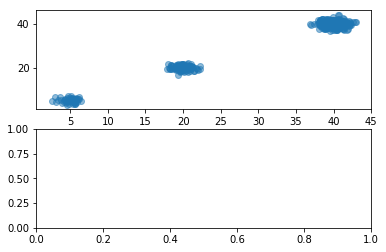

In [24]:

#Generating some data with normal distribution at 
#(0,0)
#(8,8)
#(12,0)
#(15,15)
#Data=GenerateData()
 
Data = np.random.randn(50,10) + 5
Data1 = np.random.randn(100, 10) + 20
Data2 = np.random.randn(500, 10) + 40
Data = np.concatenate((Data, Data1, Data2))
#Adding some noise with uniform distribution 
#X between [-3,17],
#Y between [-3,17]
#noise=scipy.rand(50,2)*20 -3
 
#Noisy_Data=numpy.concatenate((Data,noise))
#size=20
 
fig = plt.figure()
ax1=fig.add_subplot(2,1,1) #row, column, figure number
ax2 = fig.add_subplot(212)
 
ax1.scatter(Data[:,0],Data[:,1], alpha =  0.5 )
#x1.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
#ax2.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
 
Epsilon=5 #euclidean distance
MinumumPoints=3
result =DBSCAN(Data,Epsilon,MinumumPoints)
 
#printed numbers are cluster numbers
print(result)
#print "Noisy_Data"
#print Noisy_Data.shape
#print Noisy_Data
 
#for i in range(len(result)):
#    ax2.scatter(Noisy_Data[i][0],Noisy_Data[i][1],color='yellow' ,alpha =  0.5)
      
plt.show()

In [5]:
x1=np.random.randn(50,2)
x2x=np.random.randn(80,1)+12
x2y=np.random.randn(80,1)
x2=np.column_stack((x2x,x2y))
x3=np.random.randn(100,2)+8
x4=np.random.randn(120,2)+15
z=np.concatenate((x1,x2,x3,x4))

In [22]:
Data = np.random.randn(50,10)
Data1 = np.random.randn(100, 10)
Data2 = np.random.randn(500, 10)

In [23]:
Data

array([[-5.71427365e-01,  1.25804387e-03,  9.67539492e-01,
         4.66445415e-01, -1.37877768e-01, -1.72386013e-01,
        -2.84313654e-01,  3.61423609e-01, -1.40265696e+00,
        -1.32877780e+00],
       [ 1.43463962e+00, -2.22128510e+00,  4.46316488e-01,
        -3.02003113e-02,  2.01306958e-01, -1.01459977e+00,
         9.89490844e-03, -1.61316901e+00, -5.54307593e-01,
         2.96763800e-01],
       [ 1.99731997e-01, -6.45973806e-01, -1.21107329e+00,
         9.92355571e-01,  1.59901190e+00, -1.33134433e+00,
         1.02244015e+00,  2.14084544e-01, -2.63777309e-01,
         6.59027667e-01],
       [-2.44945807e-01, -1.82425711e+00,  4.59490268e-01,
        -5.09507382e-02,  9.63223758e-01, -1.07269972e+00,
        -1.69442345e+00, -7.17573528e-01,  9.09642160e-01,
         3.10854451e-01],
       [ 1.47074708e-01,  4.46384517e-01,  1.68450206e-01,
         4.94173228e-02,  1.00649348e-01,  1.36058230e+00,
        -7.46426311e-01, -1.28995693e+00, -8.73941655e-01,
         3.